In [68]:
import pandas as pd

# Step 1: Load the dataset
file_path = "used_car_dataset.csv"
df = pd.read_csv(file_path)

print(df.info())  # Data types and null values
print(df.describe())  # Summary statistics
print(df.head())  # First few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB
None
              Year          Age
count  9582.000000  9582.000000
mean   2016.361094     7.638906
std       4.087226     4.087226
min    1986.000000     0.000000
25%    2014.000000     5.000000
50%    2017.000000     7.000000
75%    2019.000000    10.000000
max    2024.000000    38.000000
  

In [70]:
print(df.isnull().sum())  # Count missing values

Brand            0
model            0
Year             0
Age              0
kmDriven        47
Transmission     0
Owner            0
FuelType         0
PostedDate       0
AdditionInfo     0
AskPrice         0
dtype: int64


In [72]:
df['kmDriven'] = df['kmDriven'].str.replace(',', '').str.replace(' km', '', regex=False).astype(float)
print("Missing values in 'kmDriven':", df['kmDriven'].isnull().sum())
df['kmDriven'].fillna(df['kmDriven'].median(), inplace=True)  # Fill missing values with the median

Missing values in 'kmDriven': 47


In [74]:
df['AskPrice'] = df['AskPrice'].str.replace('₹', '', regex=False).str.replace(',', '').astype(float)

In [76]:
df.drop(columns=['AdditionInfo','PostedDate','Year'], inplace=True)

In [78]:
# Check frequency distribution of `Brand`
brand_counts = df['Brand'].value_counts()
print("Brand Frequency Distribution:")
print(brand_counts)

# Check frequency distribution of `model`
model_counts = df['model'].value_counts()
print("\nModel Frequency Distribution:")
print(model_counts)

Brand Frequency Distribution:
Brand
Maruti Suzuki    2720
Hyundai          1529
Honda             802
Toyota            777
Mahindra          560
Mercedes-Benz     402
Tata              389
BMW               342
Volkswagen        318
Audi              264
Ford              245
Renault           240
Skoda             183
Kia               161
Chevrolet          89
MG                 80
Nissan             75
Jeep               74
Land Rover         71
Volvo              48
Mini               41
Jaguar             34
Porsche            24
Fiat               22
Datsun             22
Lexus              20
Mitsubishi         18
Isuzu              10
Force               6
Ambassador          3
Rolls-Royce         2
Bajaj               2
Opel                2
Ssangyong           2
Aston Martin        1
ICML                1
Ashok               1
Bentley             1
Maserati            1
Name: count, dtype: int64

Model Frequency Distribution:
model
City                330
Wagon-R            

In [80]:
threshold = 100  # Rare brands appear less than 10 times

# Find rare brands that appear less than the threshold
rare_brands = brand_counts[brand_counts < threshold].index
print("Rare Brands:", rare_brands)

Rare Brands: Index(['Chevrolet', 'MG', 'Nissan', 'Jeep', 'Land Rover', 'Volvo', 'Mini',
       'Jaguar', 'Porsche', 'Fiat', 'Datsun', 'Lexus', 'Mitsubishi', 'Isuzu',
       'Force', 'Ambassador', 'Rolls-Royce', 'Bajaj', 'Opel', 'Ssangyong',
       'Aston Martin', 'ICML', 'Ashok', 'Bentley', 'Maserati'],
      dtype='object', name='Brand')


In [82]:
# Find rare models that appear less than the threshold
rare_models = model_counts[model_counts < threshold-50].index
print("Rare Models:", rare_models)


Rare Models: Index(['A4', 'Etios', 'Elite i20', 'Xcent', 'Civic', 'Bolero', '3 Series',
       'Hector', 'X1', 'Q3',
       ...
       'Punto Pure', 'LS', 'Boxster', 'TUV 300-plus', 'XC90', 'H5x', 'Punch',
       'Tiguan All Space', 'Cedia', 'Gran Turismo'],
      dtype='object', name='model', length=348)


In [84]:
# Group rare brands into 'Other'
df['Brand'] = df['Brand'].apply(lambda x: 'Other' if x in rare_brands else x)

# Group rare models into 'Other'
df['model'] = df['model'].apply(lambda x: 'Other' if x in rare_models else x)


In [86]:
# Check the updated frequency distribution
print("\nUpdated Brand Frequency Distribution:")
print(df['Brand'].value_counts())

print("\nUpdated Model Frequency Distribution:")
print(df['model'].value_counts())


Updated Brand Frequency Distribution:
Brand
Maruti Suzuki    2720
Hyundai          1529
Honda             802
Toyota            777
Other             650
Mahindra          560
Mercedes-Benz     402
Tata              389
BMW               342
Volkswagen        318
Audi              264
Ford              245
Renault           240
Skoda             183
Kia               161
Name: count, dtype: int64

Updated Model Frequency Distribution:
model
Other             3376
City               330
Wagon-R            311
Swift              283
Creta              260
Ertiga             249
Swift-Dzire        229
Celerio            189
Baleno             179
Innova Crysta      179
Grand i10          177
i10                170
i20                163
Fortuner           161
Verna              153
Eeco               146
Amaze              143
XUV500             141
Polo               136
Innova             122
Alto-800           113
KWID               111
Ecosport           106
5 Series            97
Wa

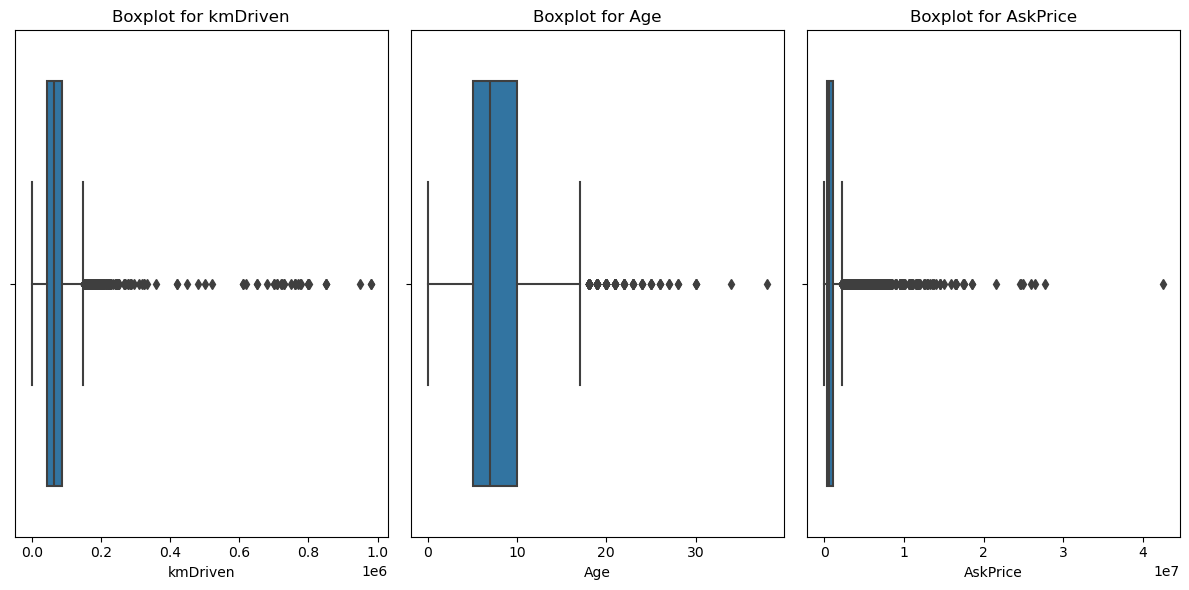

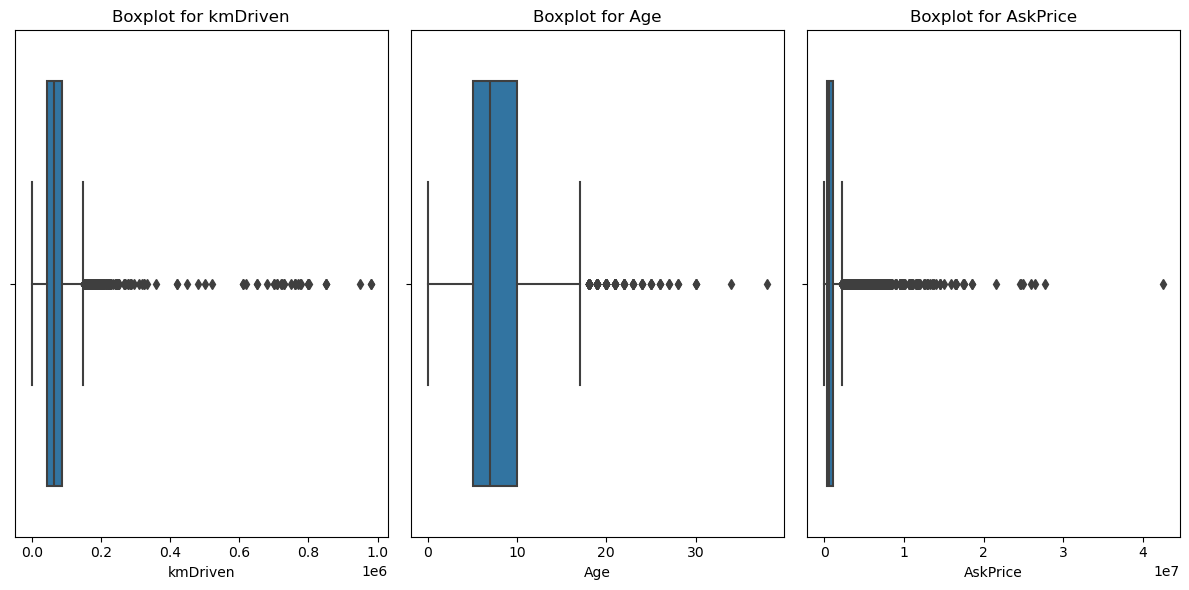

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for numerical features
plt.figure(figsize=(12, 6))

# Plot for kmDriven
plt.subplot(1, 3, 1)
sns.boxplot(x=df['kmDriven'])
plt.title('Boxplot for kmDriven')

# Plot for Age
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')

# Plot for AskPrice
plt.subplot(1, 3, 3)
sns.boxplot(x=df['AskPrice'])
plt.title('Boxplot for AskPrice')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for numerical features
plt.figure(figsize=(12, 6))

# Plot for kmDriven
plt.subplot(1, 3, 1)
sns.boxplot(x=df['kmDriven'])
plt.title('Boxplot for kmDriven')

# Plot for Age
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age')

# Plot for AskPrice
plt.subplot(1, 3, 3)
sns.boxplot(x=df['AskPrice'])
plt.title('Boxplot for AskPrice')

# Adjust layout for clarity
plt.tight_layout()

# Save the figure as a PNG image with 400x400 resolution
plt.savefig('boxplots_numerical_features.png', dpi=400)

plt.show()


In [89]:
for _ in range(2):
    Q1 = df[['kmDriven', 'Age', 'AskPrice']].quantile(0.25)
    Q3 = df[['kmDriven', 'Age', 'AskPrice']].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    df = df[
        (df['kmDriven'] >= lower_bound['kmDriven']) & 
        (df['kmDriven'] <= upper_bound['kmDriven']) &
        (df['Age'] >= lower_bound['Age']) & 
        (df['Age'] <= upper_bound['Age']) &
        (df['AskPrice'] >= lower_bound['AskPrice']) & 
        (df['AskPrice'] <= upper_bound['AskPrice'])
    ]


In [90]:
print(f"cleaned data shape: {df.shape}")

cleaned data shape: (7715, 8)


               Age       kmDriven      AskPrice
count  7715.000000    7715.000000  7.715000e+03
mean      7.756837   65292.648607  6.263179e+05
std       3.751412   29436.851520  3.828726e+05
min       0.000000       0.000000  1.850000e+04
25%       5.000000   46000.000000  3.450000e+05
50%       8.000000   65000.000000  5.350000e+05
75%      10.000000   84000.000000  8.250000e+05
max      17.000000  142500.000000  1.721000e+06


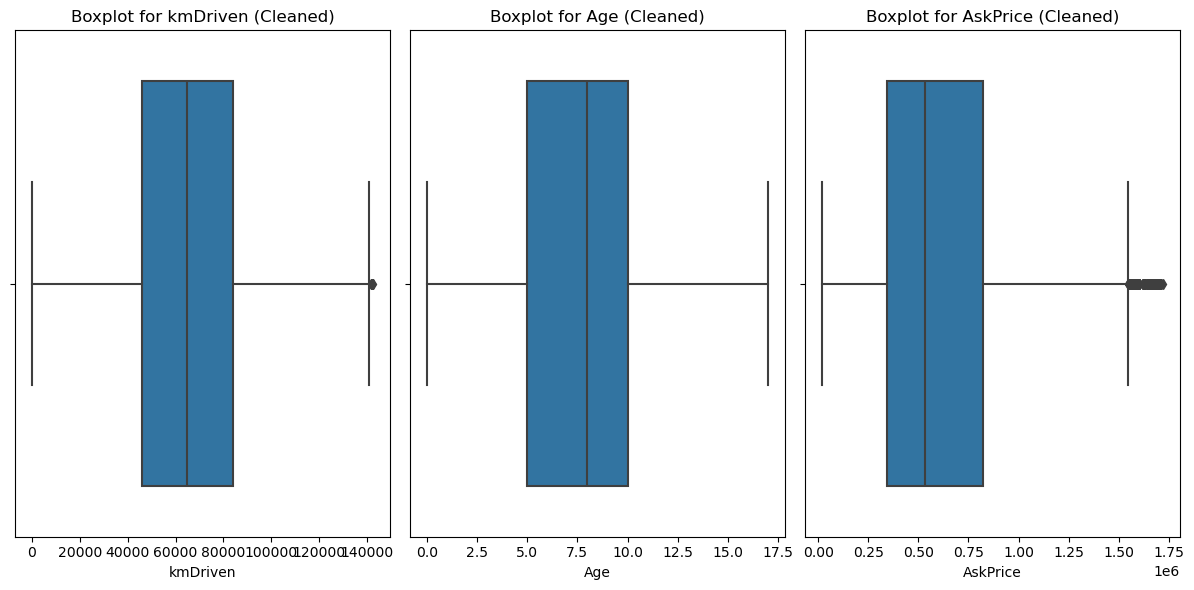

In [94]:
# # Check the summary statistics and boxplots again for cleaned data
# print(df.describe())

# # Create boxplots again for cleaned data
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 3, 1)
# sns.boxplot(x=df['kmDriven'])
# plt.title('Boxplot for kmDriven (Cleaned)')

# plt.subplot(1, 3, 2)
# sns.boxplot(x=df['Age'])
# plt.title('Boxplot for Age (Cleaned)')

# plt.subplot(1, 3, 3)
# sns.boxplot(x=df['AskPrice'])
# plt.title('Boxplot for AskPrice (Cleaned)')

# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Check the summary statistics
print(df.describe())

# Create boxplots again for cleaned data
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=df['kmDriven'])
plt.title('Boxplot for kmDriven (Cleaned)')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['Age'])
plt.title('Boxplot for Age (Cleaned)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['AskPrice'])
plt.title('Boxplot for AskPrice (Cleaned)')

# Adjust layout for clarity
plt.tight_layout()

# Save the figure as a PNG image with 400x400 resolution
plt.savefig('boxplots_cleaned.png', dpi=400)

plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


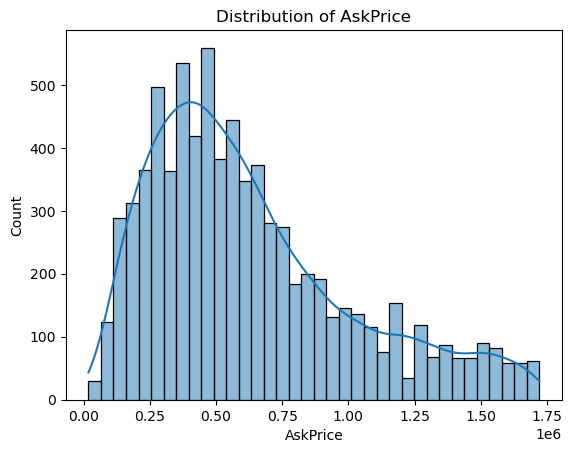

In [96]:
# Check the distribution of the target variable
sns.histplot(df['AskPrice'], kde=True)
plt.title('Distribution of AskPrice')
plt.show()

In [98]:
import numpy as np
# Apply log transformation if the distribution is skewed
df['Log_AskPrice'] = np.log1p(df['AskPrice'])

In [100]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7715 entries, 2 to 9581
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         7715 non-null   object 
 1   model         7715 non-null   object 
 2   Age           7715 non-null   int64  
 3   kmDriven      7715 non-null   float64
 4   Transmission  7715 non-null   object 
 5   Owner         7715 non-null   object 
 6   FuelType      7715 non-null   object 
 7   AskPrice      7715 non-null   float64
 8   Log_AskPrice  7715 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 602.7+ KB
None


In [103]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [105]:
# Define the Gaussian Process kernel with length scale bounds and WhiteKernel for noise
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.03**2)

# Define features (X) and target (y)
X = df.drop(columns=['AskPrice', 'Log_AskPrice'])
y = df['Log_AskPrice']

# Define the column transformer to apply one-hot encoding to categorical features
categorical_cols = ['Brand', 'model', 'Transmission', 'Owner', 'FuelType']  # specify the categorical columns
numerical_cols = ['Age', 'kmDriven']  # numerical columns

# Apply OneHotEncoder for categorical columns (sparse=False to return dense matrix)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical columns
        ('cat', OneHotEncoder(sparse=False), categorical_cols)   # One-hot encode categorical columns with dense matrix
    ])

# Create a pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-10))
])

# Split the data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Absolute Error (MAE): 0.18992293963863346
Mean Squared Error (MSE): 0.07150316986554413
Root Mean Squared Error (RMSE): 0.2674007663892236
R² Score: 0.8351518484700334


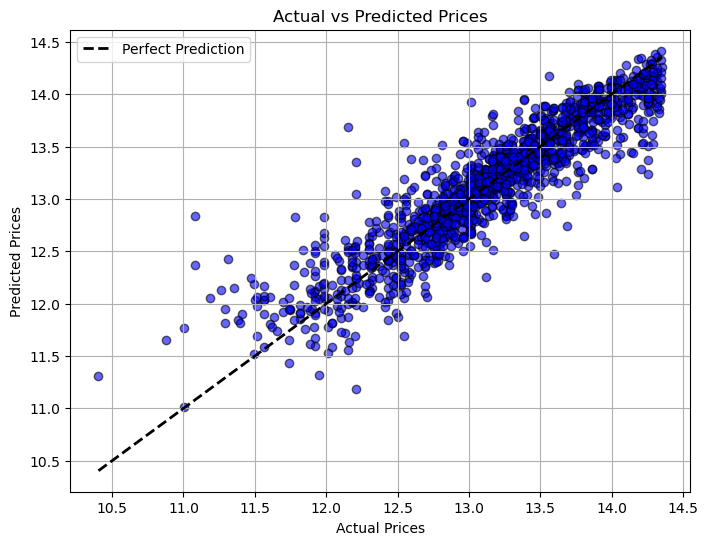

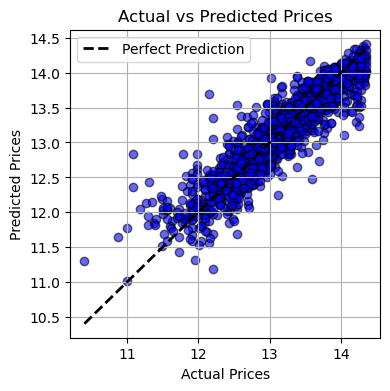

In [107]:
# import matplotlib.pyplot as plt
# import numpy as np

# Scatter plot for actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()


import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted target values
plt.figure(figsize=(4,4))  # 4 inches by 4 inches, which is 400x400 pixels at 100 DPI
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.grid(True)

# Save the figure with 400x400 pixels (100 DPI * 4 inches)
plt.savefig("actual_vs_predicted_prices.png", dpi=100)  # 100 DPI will result in a 400x400 image
plt.show()



In [109]:
# new data for prediction 
new_data_car = pd.DataFrame({
    'Brand': ['Mercedes-Benz','Maruti Suzuki'],
    'model': ['C-Class','Wagon-R'],
    'Age': [8,1],
    'kmDriven': [5400,28],
    'Transmission': ['Automatic','Manual'],
    'Owner': ['second','first'],
    'FuelType': ['Diesel','Hybrid/CNG']
})

# Ensure new data has the same column order and types as the original data
# Use the pipeline to preprocess and make predictions
predicted_log_ask_price = pipeline.predict(new_data_car)

# Convert the predicted log price back to the original scale, if necessary
predicted_ask_price = np.exp(predicted_log_ask_price)

# Print the prediction
print(f"Predicted Log Ask Price: {predicted_log_ask_price}")
print(f"Predicted Ask Price: {predicted_ask_price}")


Predicted Log Ask Price: [13.96474939 13.26736458]
Predicted Ask Price: [1160950.22258836  578020.47803332]


In [111]:
# Create PriceCategory based on AskPrice (threshold can be adjusted)
price_threshold = df['AskPrice'].median()
df['PriceCategory'] = np.where(df['AskPrice'] > price_threshold, 'Expensive', 'Affordable')
print(df)

              Brand      model  Age  kmDriven Transmission   Owner  \
2        Volkswagen  VentoTest   14   77246.0       Manual   first   
3     Maruti Suzuki      Swift    7   83500.0       Manual  second   
4     Maruti Suzuki     Baleno    5   45000.0    Automatic   first   
5               BMW      Other   10   83000.0    Automatic   first   
8     Maruti Suzuki      Other    4   33759.0       Manual  second   
...             ...        ...  ...       ...          ...     ...   
9577          Skoda      Other   10  105904.0    Automatic  second   
9578  Maruti Suzuki   Alto-800    4   55000.0       Manual   first   
9579  Maruti Suzuki       Ritz   11   92000.0       Manual   first   
9580        Hyundai      Verna    5   72000.0    Automatic   first   
9581        Hyundai      Other    3   83228.0       Manual  second   

        FuelType   AskPrice  Log_AskPrice PriceCategory  
2         Diesel   184999.0     12.128111    Affordable  
3         Diesel   565000.0     13.244583  

In [113]:
# Check for class distribution (PriceCategory)
class_counts = df['PriceCategory'].value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_counts)

Class Distribution:
PriceCategory
Affordable    3870
Expensive     3845
Name: count, dtype: int64


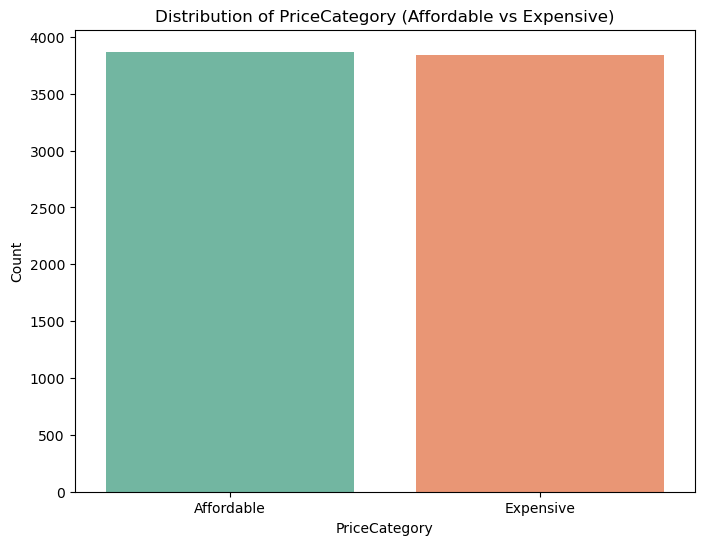

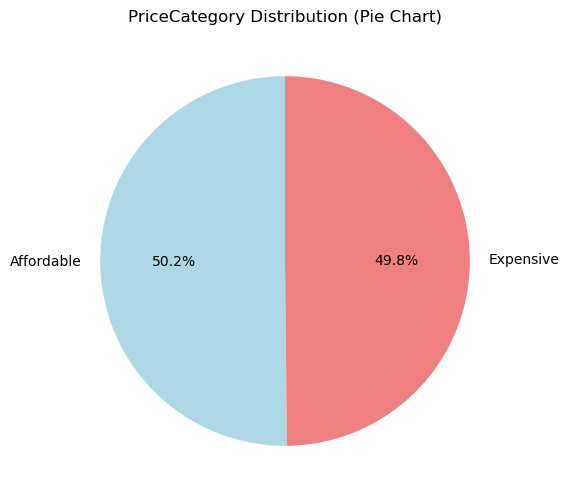

In [115]:
# Visualize the class distribution with a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='PriceCategory', data=df, palette='Set2')
plt.title('Distribution of PriceCategory (Affordable vs Expensive)')
plt.xlabel('PriceCategory')
plt.ylabel('Count')
plt.show()

# Optionally, plot a pie chart for a quick visual check
plt.figure(figsize=(6, 6))
df['PriceCategory'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('PriceCategory Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.90

Confusion Matrix:
[[694  77]
 [ 71 701]]

Classification Report:
              precision    recall  f1-score   support

  Affordable       0.91      0.90      0.90       771
   Expensive       0.90      0.91      0.90       772

    accuracy                           0.90      1543
   macro avg       0.90      0.90      0.90      1543
weighted avg       0.90      0.90      0.90      1543



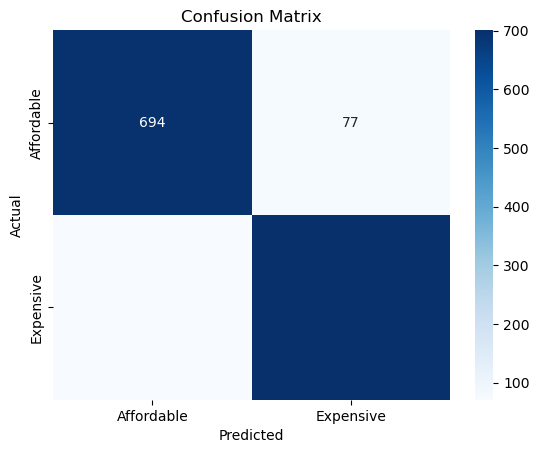

In [117]:
# Prepare features (X) and target (y) for classification
X_class = df.drop(columns=['AskPrice', 'Log_AskPrice', 'PriceCategory'])
y_class = df['PriceCategory']  # This is our classification target variable

# Split the dataset into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Define preprocessing for numerical and categorical features
categorical_cols = ['Brand', 'model', 'Transmission', 'Owner', 'FuelType']  # specify categorical columns
numerical_cols = ['Age', 'kmDriven']  # numerical columns

# Preprocessor that applies scaling and one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse=False), categorical_cols)
    ])

# Define the Gaussian Process Classifier kernel with RBF + WhiteKernel for noise
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.03**2)

# Create a pipeline with preprocessing and Gaussian Process Classifier
gp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianProcessClassifier(kernel=kernel))
])

# Train the Gaussian Process Classifier
gp_pipeline.fit(X_train_class, y_train_class)

# Predict on the test set
y_pred_class = gp_pipeline.predict(X_test_class)

# Evaluate the classifier
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Affordable', 'Expensive'], 
            yticklabels=['Affordable', 'Expensive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [119]:
# Prepare the new data to match the training data format
new_data = pd.DataFrame({
    'Brand': ['Mercedes-Benz'],
    'model': ['C-Class'],
    'Age': [6],
    'kmDriven': [54000],
    'Transmission': ['Manual'],
    'Owner': ['first'],
    'FuelType': ['Petrol']
})


# Make predictions on the new data
new_data_pred = gp_pipeline.predict(new_data)

# Output the predicted price category for the new data
print(f"Predicted Price Category for the new data: {new_data_pred[0]}")

Predicted Price Category for the new data: Expensive


Confusion Matrix:
[[694  77]
 [ 71 701]]


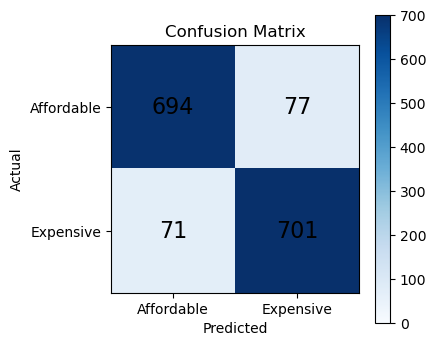

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the class labels based on the unique values in the target variable
class_labels = np.unique(y_test_class)  # ['Affordable', 'Expensive']

# Get confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class, labels=class_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create the plot
plt.figure(figsize=(4, 4))  # Create the figure with the desired size (in inches)

# Use imshow for more control over rendering
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues', vmin=0, vmax=np.max(conf_matrix))

# Add annotations (each cell in the matrix)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j]}', ha='center', va='center', color='black', fontsize=16)

# Set the labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

# Display the color bar
plt.colorbar()

# Save the plot in the current working directory
plt.savefig('confusion_matrix.png', dpi=200)  # Saves as 400x400 with 100 dpi

# Show the plot
plt.show()


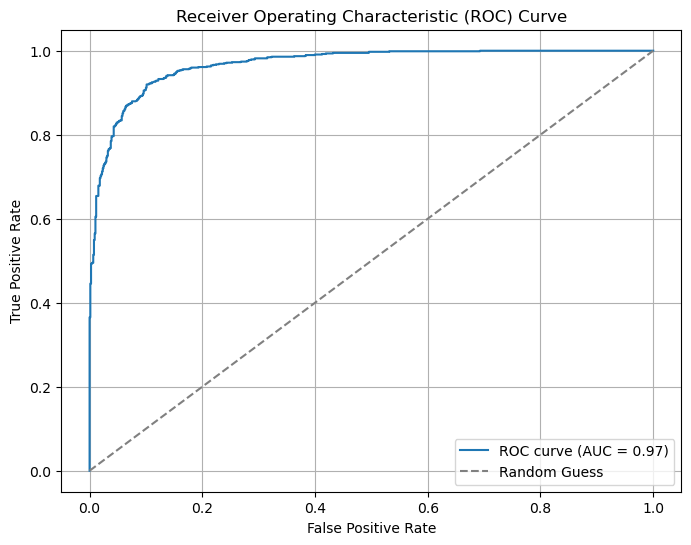

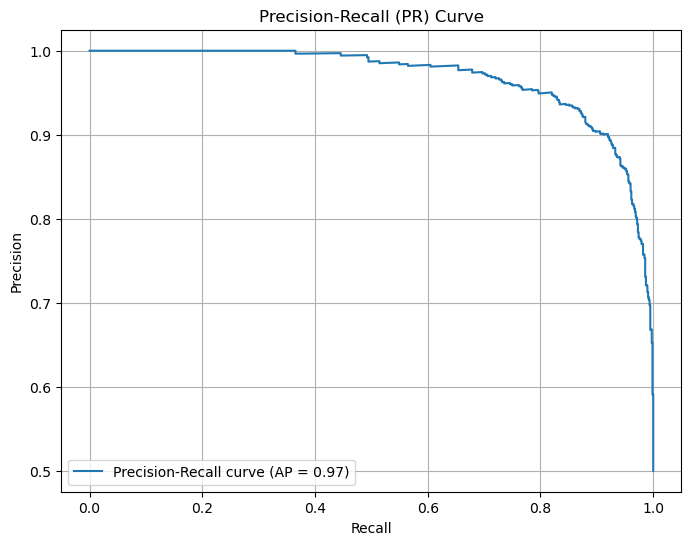

In [123]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels as numeric
label_encoder = LabelEncoder()
y_train_class_encoded = label_encoder.fit_transform(y_train_class)
y_test_class_encoded = label_encoder.transform(y_test_class)

# Predict probabilities for the test set
y_prob_class = gp_pipeline.predict_proba(X_test_class)[:, 1]  # Probability for the positive class

# Compute ROC curve and AUC score
fpr, tpr, roc_thresholds = roc_curve(y_test_class_encoded, y_prob_class, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Compute Precision-Recall curve and Average Precision score
precision, recall, pr_thresholds = precision_recall_curve(y_test_class_encoded, y_prob_class, pos_label=1)
avg_precision = average_precision_score(y_test_class_encoded, y_prob_class)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"Precision-Recall curve (AP = {avg_precision:.2f})")
plt.title('Precision-Recall (PR) Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
